In [70]:
pip install xgboost

  Using cached xgboost-1.0.2.tar.gz (821 kB)
    ERROR: Command errored out with exit status 1:
     command: /Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/cg/n5vvhnfj3dq4cskx48d369sh0000gp/T/pip-install-ek__qg57/xgboost/setup.py'"'"'; __file__='"'"'/private/var/folders/cg/n5vvhnfj3dq4cskx48d369sh0000gp/T/pip-install-ek__qg57/xgboost/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/cg/n5vvhnfj3dq4cskx48d369sh0000gp/T/pip-install-ek__qg57/xgboost/pip-egg-info
         cwd: /private/var/folders/cg/n5vvhnfj3dq4cskx48d369sh0000gp/T/pip-install-ek__qg57/xgboost/
    Complete output (27 lines):
    ++ pwd
    + oldpath=/private/var/folders/cg/n5vvhnfj3dq4cskx48d369sh0000gp/T/pip-install-ek__qg57/xgboost
    + cd ./xgboost/
    + mkdi

In [64]:
# import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import platform
import utils
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [47]:
### SETTINGS ###

pdiv = "/" if platform.system() in ("Windows", 'Darwin') else "\\"

# Data paths
path_train_normal = ".{}chest_xray{}train{}NORMAL{}".format(pdiv, pdiv, pdiv, pdiv)
path_train_pneumonia = ".{}chest_xray{}train{}PNEUMONIA{}".format(pdiv, pdiv, pdiv, pdiv)
path_val_normal = ".{}chest_xray{}val{}NORMAL{}".format(pdiv, pdiv, pdiv, pdiv)
path_val_pneumonia = ".{}chest_xray{}val{}PNEUMONIA{}".format(pdiv, pdiv, pdiv, pdiv)
path_test_normal = ".{}chest_xray{}test{}NORMAL{}".format(pdiv, pdiv, pdiv, pdiv)
path_test_pneumonia = ".{}chest_xray{}test{}PNEUMONIA{}".format(pdiv, pdiv, pdiv, pdiv)

# Labels
normal_label = "NORMAL"
pneumonia_label = "PNEUMONIA"

labels = sorted([normal_label, pneumonia_label])

In [48]:
### MODEL PARAMETERS ###

optimizer_func = "adam"
loss_func = "binary_crossentropy"
epochs_num = 3

model_name = "pneumonia_detector.model"

### CACHE FILENAMES ###
train_normal_cache = "training_normal.pickle"
train_pneumonia_cache = "training_pneumonia.pickle"
val_normal_cache = "validation_normal.pickle"
val_pneumonia_cache = "validation_pneumonia.pickle"
test_normal_cache = "testing_normal.pickle"
test_pneumonia_cache = "testing_pneumonia.pickle"

In [69]:
### LOAD TRAINING DATA AND LABELS ###

data_train_normal, label_train_normal = utils.load_data(path_train_normal, train_normal_cache, normal_label)
data_train_pneumonia, label_train_pneumonia = utils.load_data(path_train_pneumonia, train_pneumonia_cache, pneumonia_label)

# Caching, disabled for now
# utils.cache(data_train_normal, train_normal_cache)
# utils.cache(data_train_pneumonia, train_pneumonia_cache)

# Combine training images and labels
data_train = np.concatenate((data_train_normal, data_train_pneumonia), axis=0)
label_train = np.asarray(label_train_normal + label_train_pneumonia)

del data_train_normal
del data_train_pneumonia

Cache not found, loading images..
Cache not found, loading images..


In [50]:
data_train

array([None, None, None, ..., None, None, None], dtype=object)

TypeError: Image data cannot be converted to float

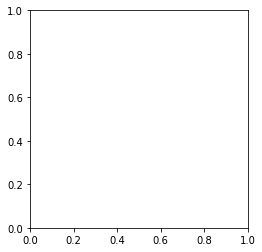

In [73]:
plt.imshow(data_train[1])
plt.show()